<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 162.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 177.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 130.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 153.1 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-12-23 10:04:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  74.8MB/s    in 2.0s    

2025-12-23 10:04:11 (74.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


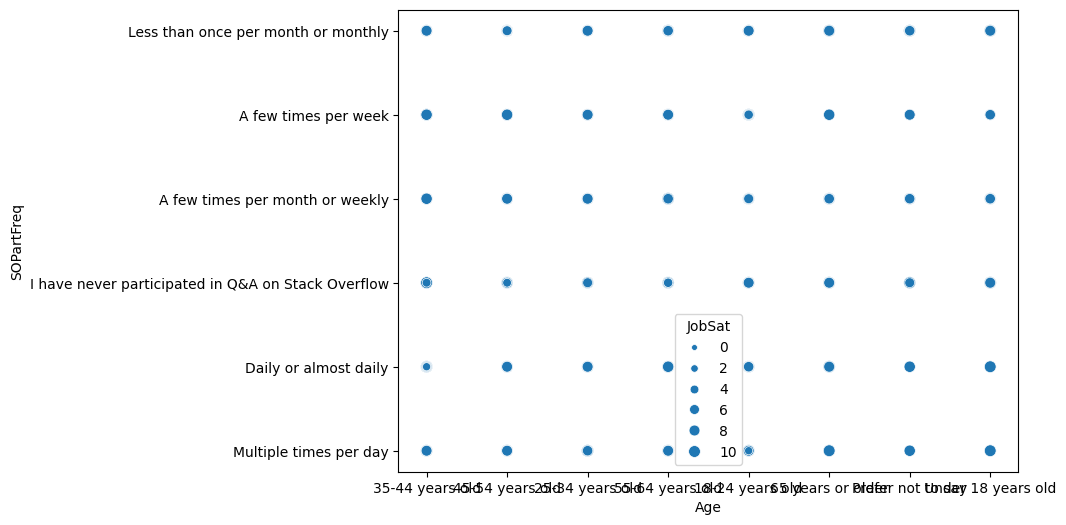

In [3]:
##Write your code here
asopart = df.loc[:,['Age','SOPartFreq','JobSat']]
asopart.dropna(subset=['Age','SOPartFreq','JobSat'], inplace=True)

asopart.head()

plt.figure(figsize=(8,6))
sns.scatterplot(data=asopart, x='Age', y='SOPartFreq', size='JobSat')
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


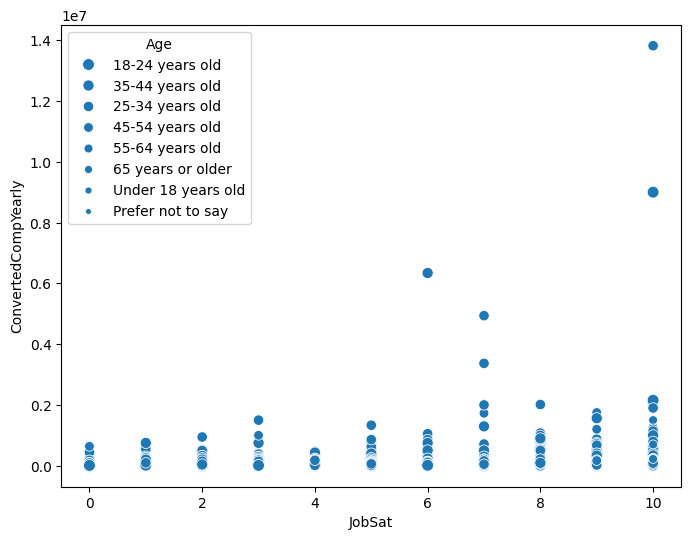

In [4]:
##Write your code here
df_CJA = df[['ConvertedCompYearly','JobSat','Age']]
df_CJA_clean = df_CJA.dropna()
df_CJA_clean

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_CJA_clean, x='JobSat', y='ConvertedCompYearly', size='Age')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [5]:
##Write your code here
# Example: Explode the language column if it contains multiple languages per respondent
df_expanded = df.assign(LanguageHaveWorkedWith=df['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Group by Age and Language, count frequency
grouped = df_expanded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

grouped

,Age,LanguageHaveWorkedWith,Frequency
0,18-24 years old,Ada,117
1,18-24 years old,Apex,71
2,18-24 years old,Assembly,1305
3,18-24 years old,Bash/Shell (all shells),4069
4,18-24 years old,C,4309
...,...,...,...
387,Under 18 years old,TypeScript,718
388,Under 18 years old,VBA,44
389,Under 18 years old,Visual Basic (.Net),77
390,Under 18 years old,Zephyr,2


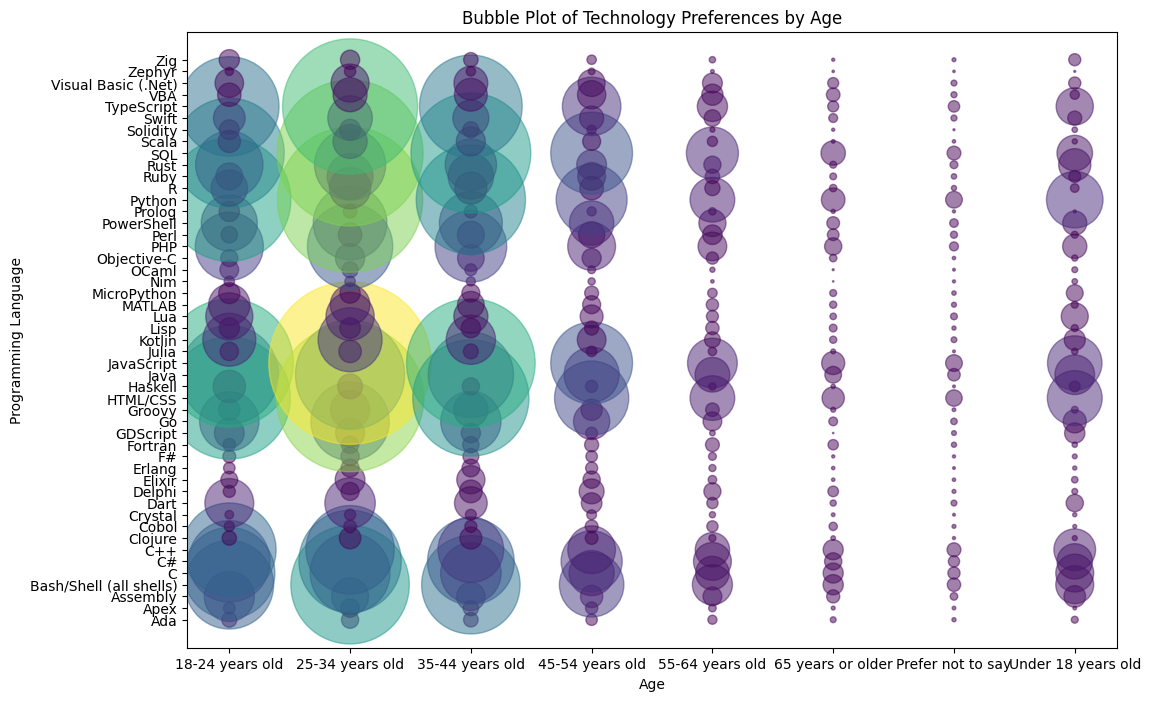

In [6]:
# Plot
plt.figure(figsize=(12,8))

# Scatter plot with bubble size proportional to frequency
scatter = plt.scatter(
    x=grouped['Age'],
    y=grouped['LanguageHaveWorkedWith'],
    s=grouped['Frequency'],  # scale bubble size as needed
    alpha=0.5,
    c=grouped['Frequency']
)

plt.xlabel('Age')
plt.ylabel('Programming Language')
plt.title('Bubble Plot of Technology Preferences by Age')
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [7]:
##Write your code here
DJ = df.loc[:,['DatabaseWantToWorkWith','JobSat']]
DJ.head()
# grouped = df.groupby(['DatabaseWantToWorkWith', 'JobSat']).size().reset_index(name='Count')

,DatabaseWantToWorkWith,JobSat
0,NaN,NaN
1,PostgreSQL,NaN
2,Firebase Realtime Database,NaN
3,MongoDB;MySQL;PostgreSQL,NaN
4,PostgreSQL;SQLite,NaN


In [8]:
DJ.dropna(subset=['DatabaseWantToWorkWith','JobSat'], inplace=True)
DJ.isnull().sum()

DatabaseWantToWorkWith    0
JobSat                    0
dtype: int64

In [9]:
DJ['Database'] = DJ['DatabaseWantToWorkWith'].str.split(';')
DJ = DJ.explode('Database')
DJ.head(10)

,DatabaseWantToWorkWith,JobSat,Database
10,Elasticsearch;MongoDB;PostgreSQL;SQLite,8.0,Elasticsearch
10,Elasticsearch;MongoDB;PostgreSQL;SQLite,8.0,MongoDB
10,Elasticsearch;MongoDB;PostgreSQL;SQLite,8.0,PostgreSQL
10,Elasticsearch;MongoDB;PostgreSQL;SQLite,8.0,SQLite
12,MySQL,8.0,MySQL
15,Microsoft SQL Server,5.0,Microsoft SQL Server
18,Microsoft SQL Server;SQLite,10.0,Microsoft SQL Server
18,Microsoft SQL Server;SQLite,10.0,SQLite
20,Microsoft SQL Server;MySQL;PostgreSQL,6.0,Microsoft SQL Server
20,Microsoft SQL Server;MySQL;PostgreSQL,6.0,MySQL


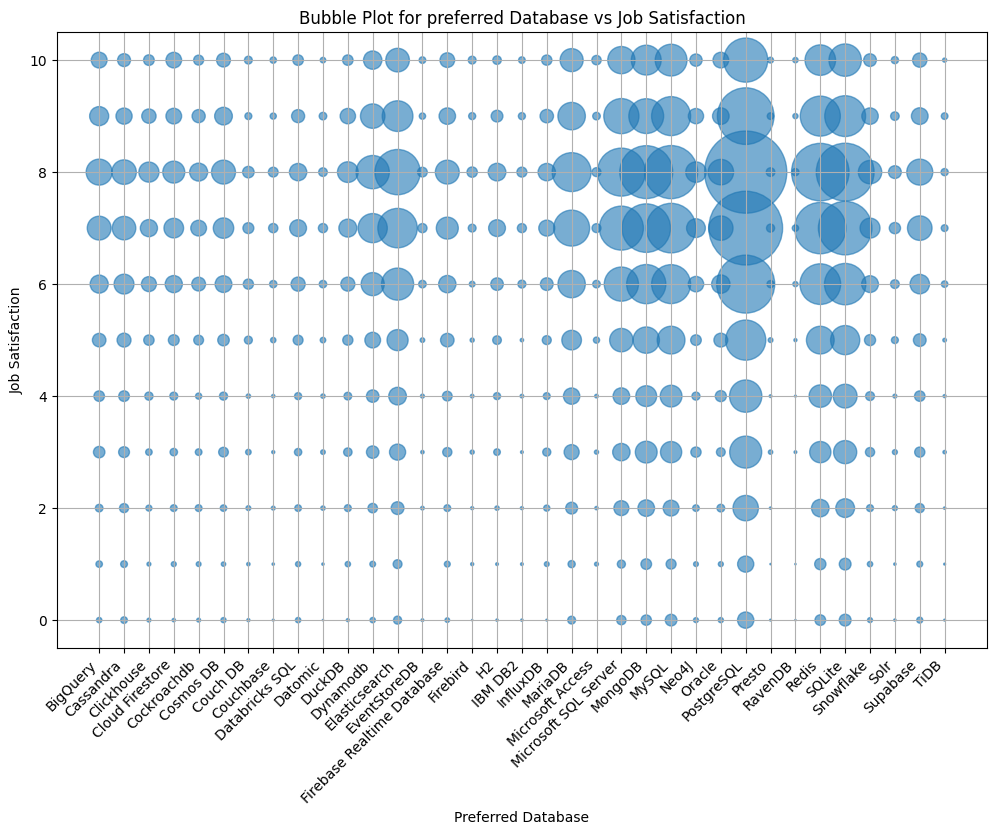

In [10]:
grouped = DJ.groupby(['Database', 'JobSat']).size().reset_index(name='Count')

plt.figure(figsize=(12,8))
plt.scatter(
    x=grouped['Database'],
    y=grouped['JobSat'],
    s=grouped['Count'],
    alpha = 0.6
)

plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot for preferred Database vs Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [11]:
##Write your code here
CDJ = df.loc[:,['ConvertedCompYearly','DevType','JobSat']]
CDJ.head()

,ConvertedCompYearly,DevType,JobSat
0,NaN,NaN,NaN
1,NaN,"Developer, full-stack",NaN
2,NaN,Developer Experience,NaN
3,NaN,"Developer, full-stack",NaN
4,NaN,"Developer, full-stack",NaN


In [12]:
CDJ.dropna(subset=['ConvertedCompYearly','DevType','JobSat'], inplace=True)
CDJ.isnull().sum()

ConvertedCompYearly    0
DevType                0
JobSat                 0
dtype: int64

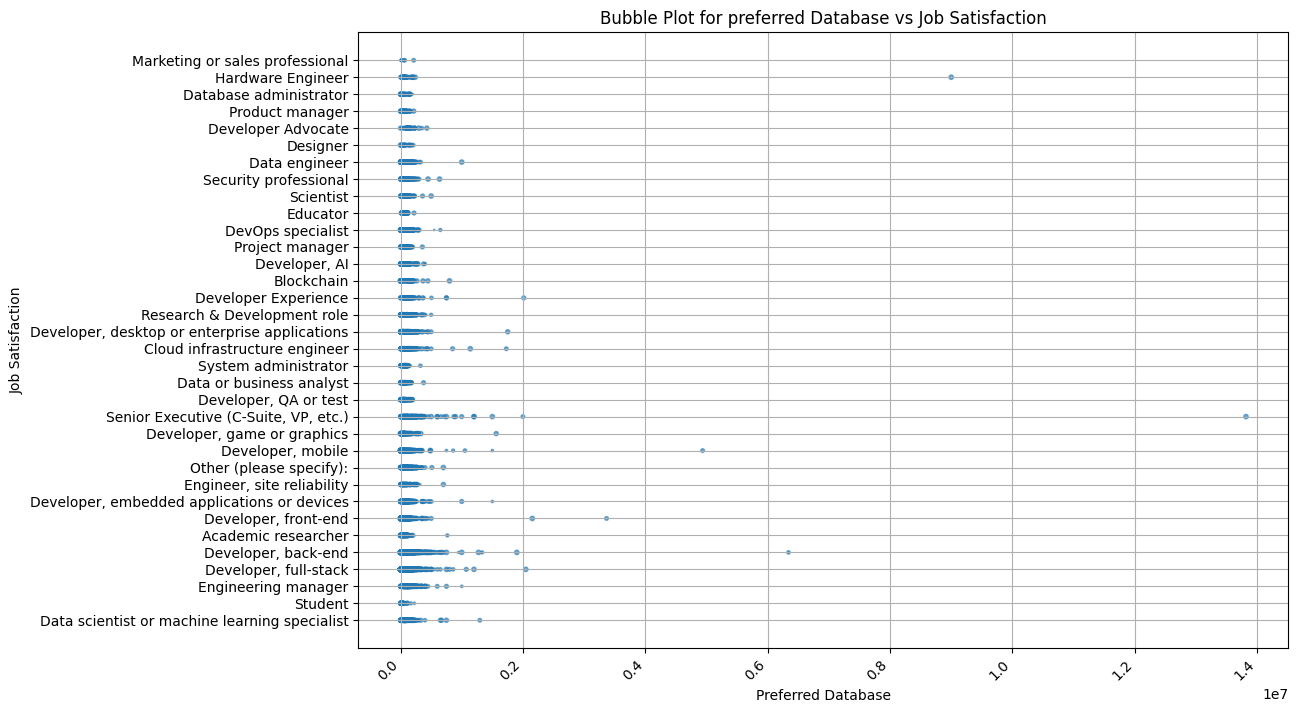

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(
    x=CDJ['ConvertedCompYearly'],
    y=CDJ['DevType'],
    s=CDJ['JobSat'],
    alpha = 0.6
)

plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot for preferred Database vs Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [14]:
##Write your code here
df_na = df.loc[:,['NEWCollabToolsHaveWorkedWith','Age']]
df_na.head()

,NEWCollabToolsHaveWorkedWith,Age
0,NaN,Under 18 years old
1,PyCharm;Visual Studio Code;WebStorm,35-44 years old
2,Visual Studio,45-54 years old
3,NaN,18-24 years old
4,Vim,18-24 years old


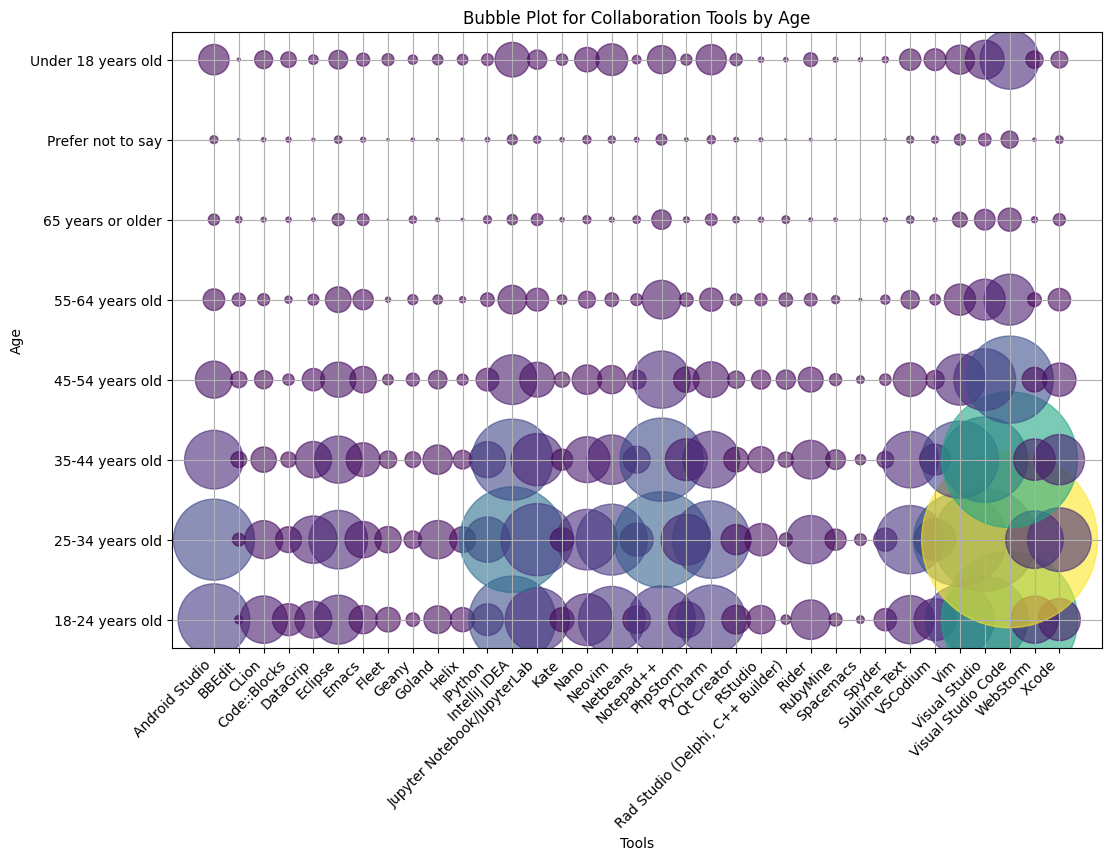

In [15]:
df_na['Tools'] = df_na['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_na = df_na.explode('Tools')

df_grouped = df_na.groupby(['Age','Tools']).size().reset_index(name='frequency')

plt.figure(figsize=(12,8))
plt.scatter(
    x=df_grouped['Tools'],
    y=df_grouped['Age'],
    s=df_grouped['frequency'],
    alpha = 0.6,
    c=df_grouped['frequency']
)

plt.xlabel('Tools')
plt.ylabel('Age')
plt.title('Bubble Plot for Collaboration Tools by Age')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [16]:
##Write your code here
WJ = df.loc[:,['WebframeWantToWorkWith','JobSat']]
WJ.head()

,WebframeWantToWorkWith,JobSat
0,NaN,NaN
1,Express;Htmx;Node.js;React;Remix,NaN
2,ASP.NET CORE,NaN
3,jQuery;Next.js;Node.js;React,NaN
4,NaN,NaN


In [17]:
WJ.dropna(subset=['WebframeWantToWorkWith','JobSat'], inplace=True)
WJ.isnull().sum()

WebframeWantToWorkWith    0
JobSat                    0
dtype: int64

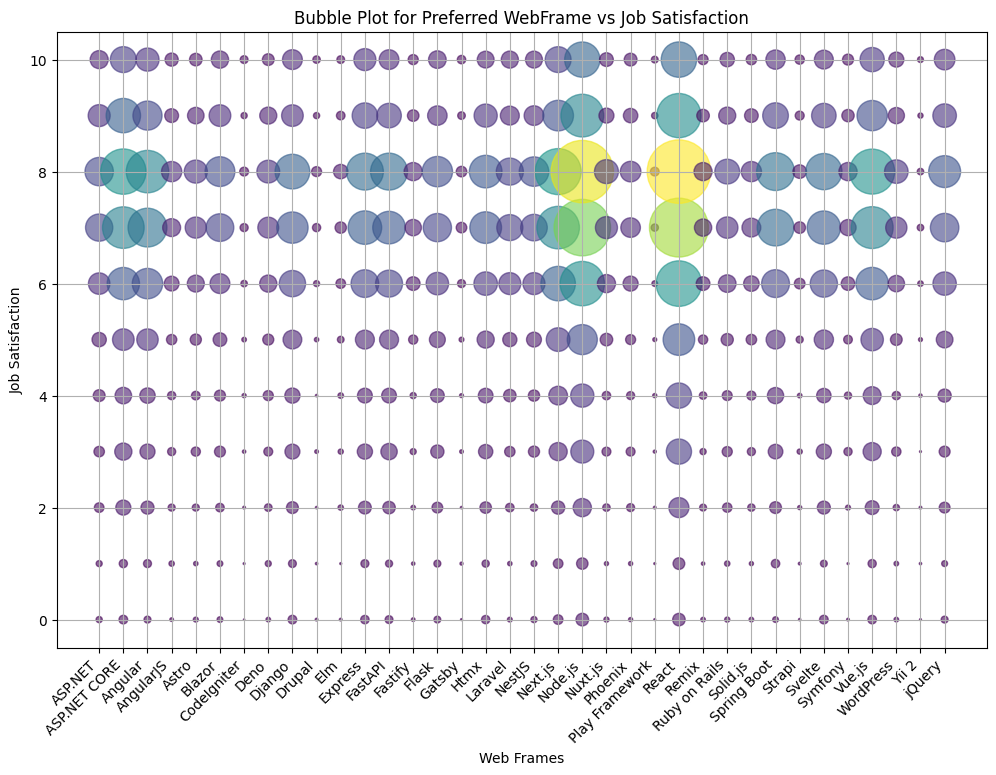

In [18]:
WJ['Webframe'] = WJ['WebframeWantToWorkWith'].str.split(';')
WJ = WJ.explode('Webframe')
WJ_group = WJ.groupby(['JobSat','Webframe']).size().reset_index(name='Count')


plt.figure(figsize=(12,8))
plt.scatter(
    x=WJ_group['Webframe'],
    y=WJ_group['JobSat'],
    s=WJ_group['Count'],
    alpha = 0.6,
    c=WJ_group['Count']
)

plt.xlabel('Web Frames')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot for Preferred WebFrame vs Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [19]:
##Write your code here
LC = df.loc[:,['LanguageAdmired','Country']]
LC.head()

,LanguageAdmired,Country
0,NaN,United States of America
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,United Kingdom of Great Britain and Northern I...
2,C#,United Kingdom of Great Britain and Northern I...
3,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,Canada
4,C++;HTML/CSS;JavaScript;Lua;Python,Norway


In [21]:
LC.dropna(subset=['LanguageAdmired','Country'], inplace=True)
LC.isnull().sum()

LanguageAdmired    0
Country            0
dtype: int64

In [23]:
LC['Language'] = LC['LanguageAdmired'].str.split(';')
LC = LC.explode('Language')

LC_grouped = LC.groupby(['Country','Language']).size().reset_index(name='frequency')
LC_grouped

,Country,Language,frequency
0,Afghanistan,Ada,114
1,Afghanistan,Apex,110
2,Afghanistan,Assembly,119
3,Afghanistan,Bash/Shell (all shells),141
4,Afghanistan,C,125
...,...,...,...
4582,Zimbabwe,PowerShell,38
4583,Zimbabwe,Python,59
4584,Zimbabwe,Rust,13
4585,Zimbabwe,SQL,64


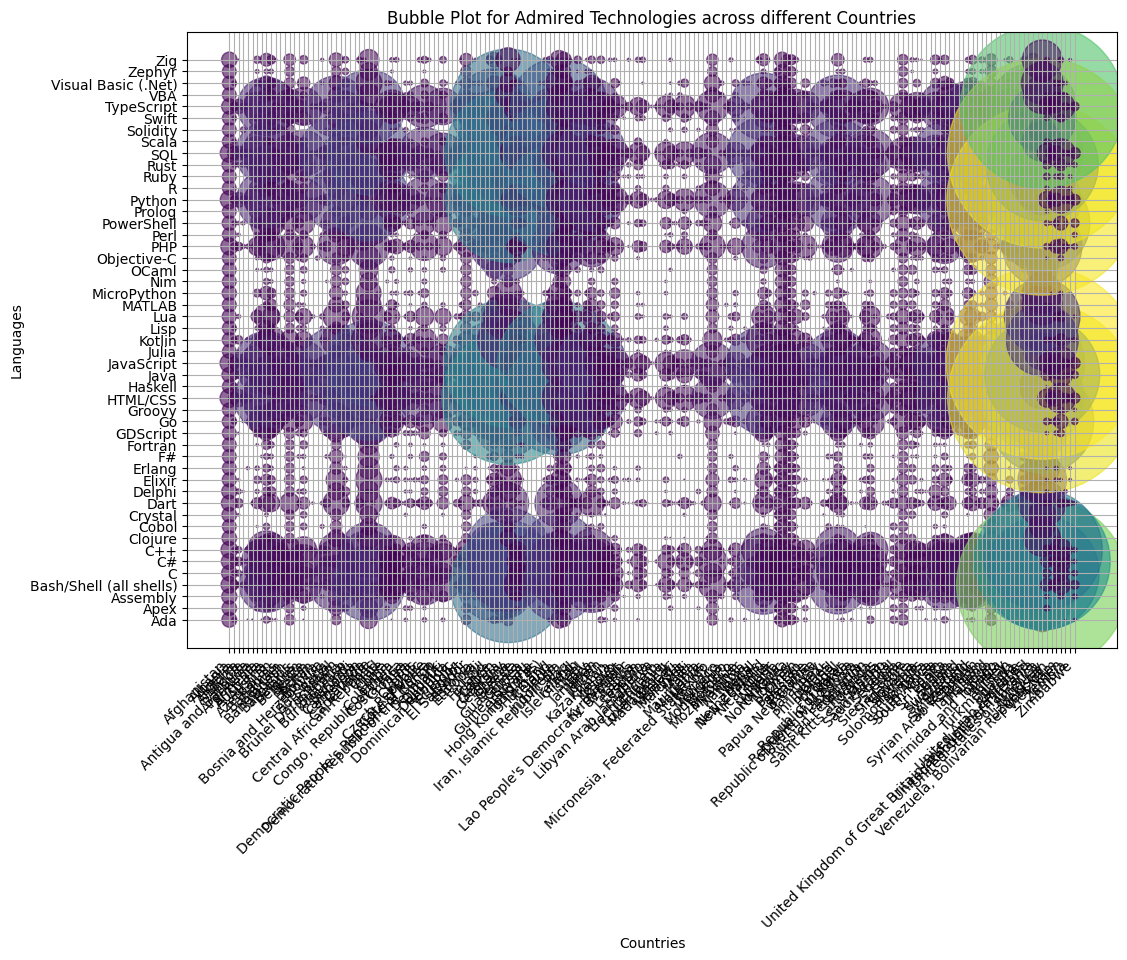

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(
    x=LC_grouped['Country'],
    y=LC_grouped['Language'],
    s=LC_grouped['frequency'],
    alpha = 0.6,
    c=LC_grouped['frequency']
)

plt.xlabel('Countries')
plt.ylabel('Languages')
plt.title('Bubble Plot for Admired Technologies across different Countries')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
